# 基于自编码器的特征学习

## 瓶颈层数据完全通过

Train on 670 samples, validate on 330 samples
Epoch 1/200
670/670 - 1s - loss: 0.2158 - val_loss: 0.1754
Epoch 2/200
670/670 - 0s - loss: 0.0335 - val_loss: 0.1012
Epoch 3/200
670/670 - 0s - loss: 0.0214 - val_loss: 0.0544
Epoch 4/200
670/670 - 0s - loss: 0.0174 - val_loss: 0.0342
Epoch 5/200
670/670 - 0s - loss: 0.0150 - val_loss: 0.0193
Epoch 6/200
670/670 - 0s - loss: 0.0135 - val_loss: 0.0127
Epoch 7/200
670/670 - 0s - loss: 0.0132 - val_loss: 0.0108
Epoch 8/200
670/670 - 0s - loss: 0.0114 - val_loss: 0.0079
Epoch 9/200
670/670 - 0s - loss: 0.0102 - val_loss: 0.0077
Epoch 10/200
670/670 - 0s - loss: 0.0110 - val_loss: 0.0058
Epoch 11/200
670/670 - 0s - loss: 0.0101 - val_loss: 0.0060
Epoch 12/200
670/670 - 0s - loss: 0.0100 - val_loss: 0.0064
Epoch 13/200
670/670 - 0s - loss: 0.0092 - val_loss: 0.0058
Epoch 14/200
670/670 - 0s - loss: 0.0085 - val_loss: 0.0047
Epoch 15/200
670/670 - 0s - loss: 0.0090 - val_loss: 0.0059
Epoch 16/200
670/670 - 0s - loss: 0.0083 - val_loss: 0.0043
Epo

Epoch 137/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0017
Epoch 138/200
670/670 - 0s - loss: 0.0031 - val_loss: 0.0012
Epoch 139/200
670/670 - 0s - loss: 0.0034 - val_loss: 9.9616e-04
Epoch 140/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0011
Epoch 141/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0023
Epoch 142/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0013
Epoch 143/200
670/670 - 0s - loss: 0.0033 - val_loss: 0.0018
Epoch 144/200
670/670 - 0s - loss: 0.0037 - val_loss: 0.0016
Epoch 145/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0025
Epoch 146/200
670/670 - 0s - loss: 0.0036 - val_loss: 0.0014
Epoch 147/200
670/670 - 0s - loss: 0.0033 - val_loss: 0.0017
Epoch 148/200
670/670 - 0s - loss: 0.0030 - val_loss: 0.0014
Epoch 149/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0015
Epoch 150/200
670/670 - 0s - loss: 0.0032 - val_loss: 0.0014
Epoch 151/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0015
Epoch 152/200
670/670 - 0s - loss: 0.0033 - val_loss: 0.0015
Epoch 153/200
670/67

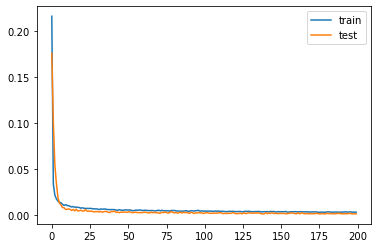

In [26]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
n_inputs = X.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

#编码器
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#瓶颈层
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

#解码器
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

#绘图
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#定义编码器模型
encoder = Model(inputs=visible, outputs=bottleneck)
#保存编码器模型
encoder.save('encoder.h5')

In [27]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               20200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 200)               800       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 100)               0   

## 增加瓶颈层

Train on 670 samples, validate on 330 samples
Epoch 1/200
670/670 - 1s - loss: 0.2278 - val_loss: 0.1746
Epoch 2/200
670/670 - 0s - loss: 0.0368 - val_loss: 0.1052
Epoch 3/200
670/670 - 0s - loss: 0.0233 - val_loss: 0.0539
Epoch 4/200
670/670 - 0s - loss: 0.0191 - val_loss: 0.0316
Epoch 5/200
670/670 - 0s - loss: 0.0160 - val_loss: 0.0195
Epoch 6/200
670/670 - 0s - loss: 0.0142 - val_loss: 0.0146
Epoch 7/200
670/670 - 0s - loss: 0.0133 - val_loss: 0.0102
Epoch 8/200
670/670 - 0s - loss: 0.0123 - val_loss: 0.0111
Epoch 9/200
670/670 - 0s - loss: 0.0122 - val_loss: 0.0087
Epoch 10/200
670/670 - 0s - loss: 0.0105 - val_loss: 0.0068
Epoch 11/200
670/670 - 0s - loss: 0.0104 - val_loss: 0.0069
Epoch 12/200
670/670 - 0s - loss: 0.0098 - val_loss: 0.0055
Epoch 13/200
670/670 - 0s - loss: 0.0091 - val_loss: 0.0058
Epoch 14/200
670/670 - 0s - loss: 0.0092 - val_loss: 0.0048
Epoch 15/200
670/670 - 0s - loss: 0.0094 - val_loss: 0.0049
Epoch 16/200
670/670 - 0s - loss: 0.0081 - val_loss: 0.0048
Epo

Epoch 137/200
670/670 - 0s - loss: 0.0041 - val_loss: 0.0023
Epoch 138/200
670/670 - 0s - loss: 0.0038 - val_loss: 0.0014
Epoch 139/200
670/670 - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 140/200
670/670 - 0s - loss: 0.0038 - val_loss: 0.0017
Epoch 141/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0018
Epoch 142/200
670/670 - 0s - loss: 0.0039 - val_loss: 0.0018
Epoch 143/200
670/670 - 0s - loss: 0.0038 - val_loss: 0.0019
Epoch 144/200
670/670 - 0s - loss: 0.0036 - val_loss: 0.0012
Epoch 145/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0011
Epoch 146/200
670/670 - 0s - loss: 0.0033 - val_loss: 0.0018
Epoch 147/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0020
Epoch 148/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0014
Epoch 149/200
670/670 - 0s - loss: 0.0036 - val_loss: 0.0021
Epoch 150/200
670/670 - 0s - loss: 0.0035 - val_loss: 0.0022
Epoch 151/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0019
Epoch 152/200
670/670 - 0s - loss: 0.0034 - val_loss: 0.0012
Epoch 153/200
670/670 - 

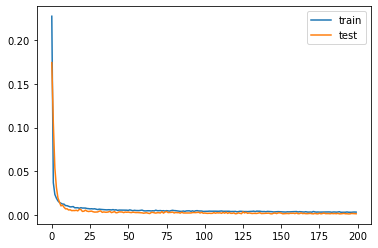

In [28]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
n_inputs = X.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# 瓶颈层数据宽度减半
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='mse')
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
encoder = Model(inputs=visible, outputs=bottleneck)
encoder.save('encoder.h5')

## 编码器作为预测模型的数据准备

### 逻辑回归数据

In [29]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 利用编码器编码

In [30]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9393939393939394


D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
